 California Housing Dataset Sample:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



 LINEAR REGRESSION RESULTS
Root Mean Squared Error (RMSE): 0.746
R² Score: 0.576


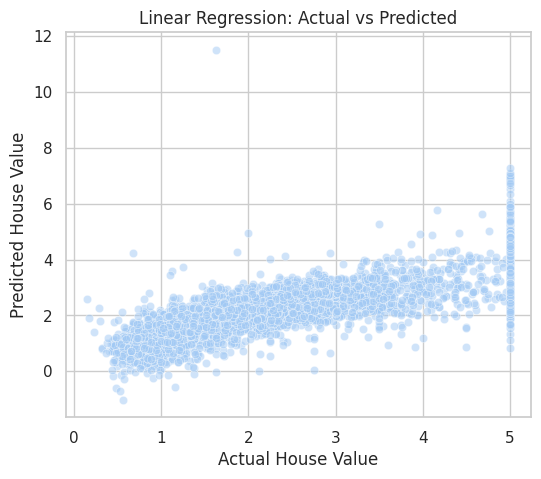


Feature Importance in Linear Regression:


,Feature,Coefficient
3,AveBedrms,0.783145
0,MedInc,0.448675
1,HouseAge,0.009724
4,Population,-0.000002
5,AveOccup,-0.003526
2,AveRooms,-0.123323
6,Latitude,-0.419792
7,Longitude,-0.433708



 Diabetes Dataset Sample:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



 LOGISTIC REGRESSION RESULTS (Diabetes Classification)
Accuracy: 0.742

Confusion Matrix:
[[37 12]
 [11 29]]


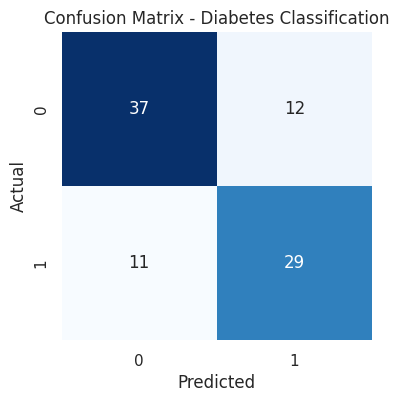


Classification Report:
               precision    recall  f1-score   support

 Low Severity       0.77      0.76      0.76        49
High Severity       0.71      0.72      0.72        40

     accuracy                           0.74        89
    macro avg       0.74      0.74      0.74        89
 weighted avg       0.74      0.74      0.74        89


 Feature Influence in Logistic Regression (Diabetes):


,Feature,Coefficient
2,bmi,2.666148
8,s5,2.440291
3,bp,2.067847
7,s4,1.531490
9,s6,1.440100
0,age,0.693373
4,s1,0.410421
5,s2,0.174499
1,sex,-0.678734
6,s3,-1.686979


In [1]:
# ==============================================================
#  LINEAR & LOGISTIC REGRESSION IMPLEMENTATION & INTERPRETATION
# ==============================================================
# - Linear Regression → Predict continuous outcome (house price)
# - Logistic Regression → Predict categorical outcome (diabetes)
# - Evaluate using RMSE, R², and Accuracy
# ==============================================================

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Set visual style
sns.set(style="whitegrid", palette="pastel")

# ==============================================================
# PART 1️ : LINEAR REGRESSION - Predicting Continuous Outcome
# ==============================================================

# Dataset: California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df_housing = housing.frame

print(" California Housing Dataset Sample:")
display(df_housing.head())

# Define features (X) and target (y)
X = df_housing.drop(columns='MedHouseVal')  # independent variables
y = df_housing['MedHouseVal']               # dependent variable (median house value)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create & train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred = lin_reg.predict(X_test)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n LINEAR REGRESSION RESULTS")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# Interpret Coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance in Linear Regression:")
display(coef_df)

# ==============================================================
# PART 2️ : LOGISTIC REGRESSION - Predicting Categorical Outcome
# ==============================================================

from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame

print("\n Diabetes Dataset Sample:")
display(df_diabetes.head())

# Create a binary target:
# 1 → High disease progression (>= median)
# 0 → Low disease progression (< median)
median_val = df_diabetes['target'].median()
df_diabetes['Severity'] = (df_diabetes['target'] >= median_val).astype(int)

# Define features and new binary target
X = df_diabetes.drop(columns=['target', 'Severity'])
y = df_diabetes['Severity']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n LOGISTIC REGRESSION RESULTS (Diabetes Classification)")
print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix Heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Diabetes Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Severity', 'High Severity']))

# Interpret coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\n Feature Influence in Logistic Regression (Diabetes):")
display(coef_df)